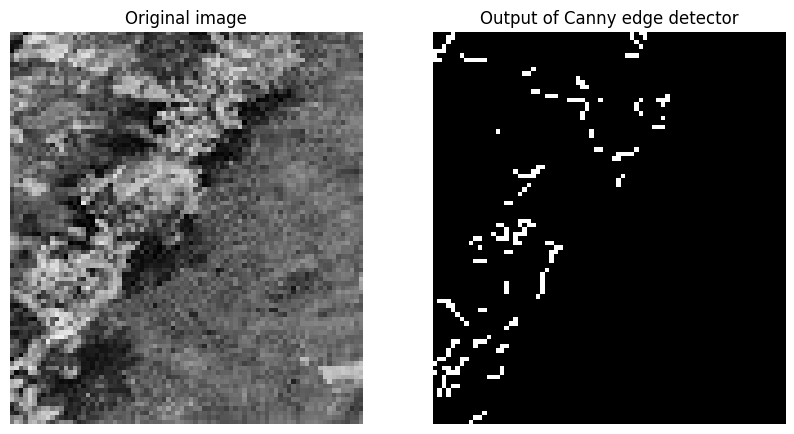

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img=cv.imread("Crop_field_cropped.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

edges=cv.Canny(img,550,690)
indices=np.where(edges!=[0])
x=indices[1]
y=indices[0]
fig,ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(edges,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Output of Canny edge detector')
ax[1].axis('off')
plt.show()






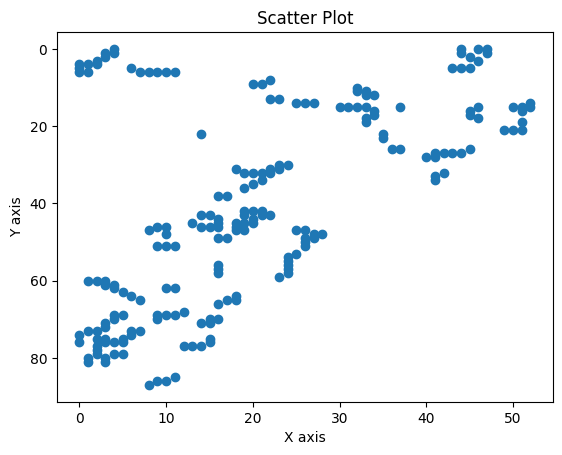

In [114]:
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread("Crop_field_cropped.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

edges=cv.Canny(img,550,690)
indices=np.where(edges!=[0])
x=indices[1]
y=indices[0]

plt.gca().invert_yaxis() #inverting y axis
plt.scatter(x,y)
plt.title('Scatter Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()



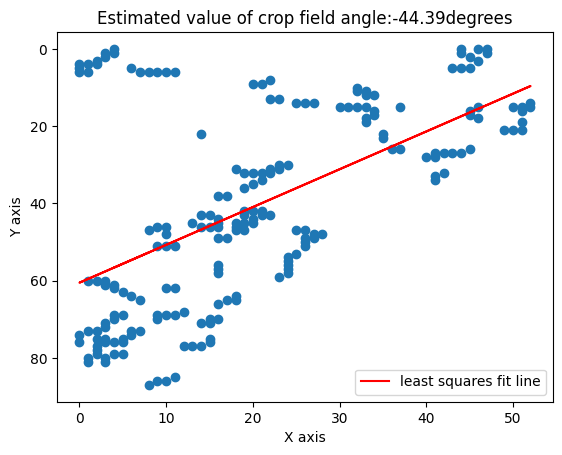

In [115]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread("Crop_field_cropped.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

edges=cv.Canny(img,550,690)
indices=np.where(edges!=0)
x=indices[1]
y=indices[0]

#least squares line fitting 
u11=np.sum((x - np.mean(x))**2)
u12=np.sum((x - np.mean(x))*(y - np.mean(y)))
m=u12/u11
c=np.mean(y)-m*(np.mean(x))
y_new=m*x+c

rad=np.arctan(m)
deg=np.degrees(rad) 
plt.gca().invert_yaxis() 
plt.scatter(x,y)
plt.plot(x,y_new,c='red',label='least squares fit line')  #plotting the line 
plt.title(f'Estimated value of crop field angle:{deg:.2f}degrees')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()




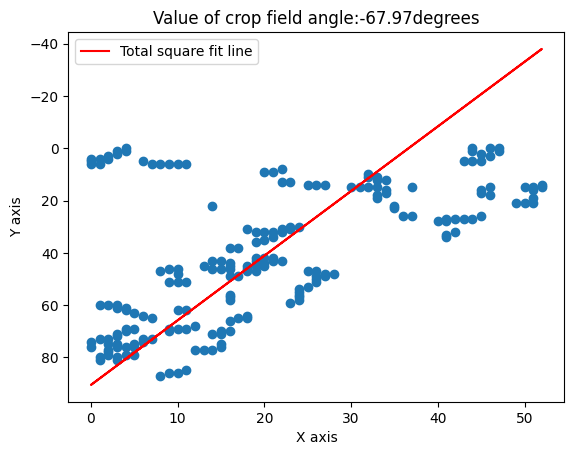

In [71]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread("Crop_field_cropped.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

edges=cv.Canny(img,550,690)
indices=np.where(edges!=0)
x=indices[1]
y=indices[0]

#total squares line fitting 
u11=np.sum((x - np.mean(x))**2)
u12=np.sum((x - np.mean(x))*(y - np.mean(y)))
u21=u12                                     
u22=np.sum((y - np.mean(y))**2)
u=np.array([[u11,u12],[u21,u22]])
w,v=np.linalg.eig(u)
smallest_eigenvector=v[:,np.argmin(w)]
a=smallest_eigenvector[0]
b=smallest_eigenvector[1]
d=a*np.mean(x)+b*np.mean(y)
m=-a/b
c=d/b

y_new=m*x+c
rad=np.arctan(m)
deg=np.degrees(rad) 

plt.gca().invert_yaxis() 
plt.scatter(x,y)
plt.plot(x,y_new,c='red',label='Total square fit line')  #plotting the line 
plt.title(f'Value of crop field angle:{deg:.2f}degrees')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

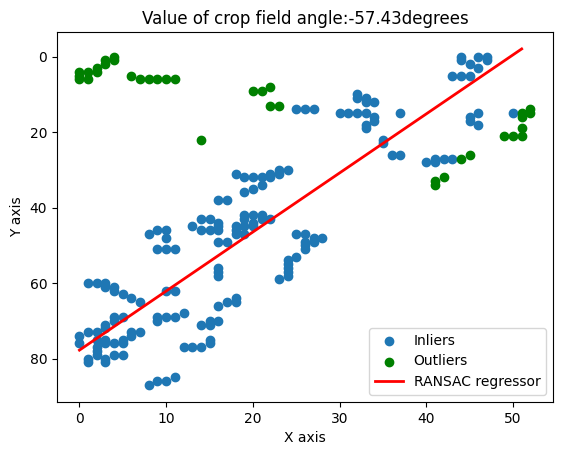

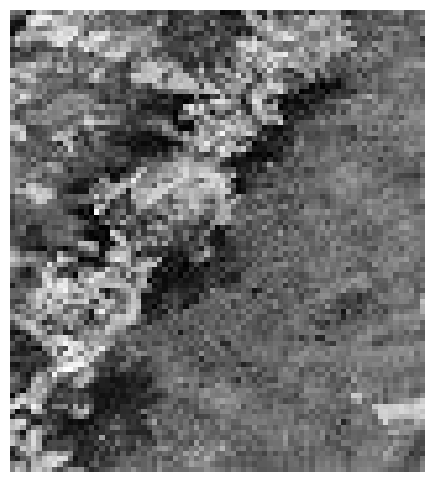

In [116]:
#RANSAC

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

img=cv.imread("Crop_field_cropped.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None

edges=cv.Canny(img,550,690)
indices=np.where(edges!=0)
x=indices[1].reshape(-1,1)
y=indices[0]

lr=linear_model.LinearRegression()
lr.fit(x,y)

ransac=linear_model.RANSACRegressor()
ransac.fit(x,y)

inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

line_x=np.arange(x.min(),x.max())[:, np.newaxis]
line_y_ransac=ransac.predict(line_x)

slope=ransac.estimator_.coef_[0]
deg=np.degrees(np.arctan(slope))

plt.scatter(x[inlier_mask],y[inlier_mask],label='Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='green',label='Outliers')
plt.plot(line_x,line_y_ransac,c='red',linewidth=2,label='RANSAC regressor')

plt.gca().invert_yaxis()
plt.legend(loc="lower right")
plt.title(f'Value of crop field angle:{deg:.2f}degrees')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.figure(figsize=(10, 6)) 
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()






